In [24]:
import pandas as pd

print("ts pmo icl fr rn")


ts pmo icl fr rn


In [25]:
data = [
    {"name": " Alice ", "age": " 25 ", "city": " New York "},
    {"name": " Bob", "age": "30 ", "city": "Los Angeles "},
    {"name": "Charlie ", "age": " N/A", "city": " Chicago"}
]

In [26]:

df = pd.DataFrame(data)



In [27]:
print(df)

       name   age          city
0    Alice    25      New York 
1       Bob   30   Los Angeles 
2  Charlie    N/A       Chicago


In [28]:
df.head()

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,N/A,Chicago


In [29]:
df.keys()

Index(['name', 'age', 'city'], dtype='object')

In [30]:
df.dtypes

name    object
age     object
city    object
dtype: object

In [31]:
df["name"] = df["name"].str.strip()
df["age"] = pd.to_numeric(df["age"].str.strip(), errors='coerce')
df["city"] = df["city"].str.strip()

In [32]:
df.dtypes

name     object
age     float64
city     object
dtype: object

In [33]:
df = pd.read_csv('titanic.csv')

In [34]:
df.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [35]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [36]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.loc[1, ['name', 'ticket']]

name      Allison, Master. Hudson Trevor
ticket                            113781
Name: 1, dtype: object

In [38]:
df.groupby('pclass').count()

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
pclass,,,,,,,,,,,,,
1.0,323,323,323,284,323,323,323,323,256,321,201,35,289
2.0,277,277,277,261,277,277,277,277,23,277,112,31,261
3.0,709,709,709,501,709,709,709,708,16,709,173,55,195


In [39]:
df.groupby('pclass')['ticket'].count()

pclass
1.0    323
2.0    277
3.0    709
Name: ticket, dtype: int64

In [40]:
df[['survived', 'age','name' ]]

,survived,age,name
0,1.0,29.0000,"Allen, Miss. Elisabeth Walton"
1,1.0,0.9167,"Allison, Master. Hudson Trevor"
2,0.0,2.0000,"Allison, Miss. Helen Loraine"
3,0.0,30.0000,"Allison, Mr. Hudson Joshua Creighton"
4,0.0,25.0000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
...,...,...,...
1305,0.0,NaN,"Zabour, Miss. Thamine"
1306,0.0,26.5000,"Zakarian, Mr. Mapriededer"
1307,0.0,27.0000,"Zakarian, Mr. Ortin"
1308,0.0,29.0000,"Zimmerman, Mr. Leo"


In [41]:
na_count = df.isna().sum()

print(na_count)

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [42]:
df = df.dropna(subset=['age', 'fare', 'embarked'])

In [44]:
na_count = df.isna().sum()

print(na_count)

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       0
boat         628
body         924
home.dest    359
dtype: int64


Survival Rate by Gender:
sex
female    0.751295
male      0.205479
Name: survived, dtype: float64


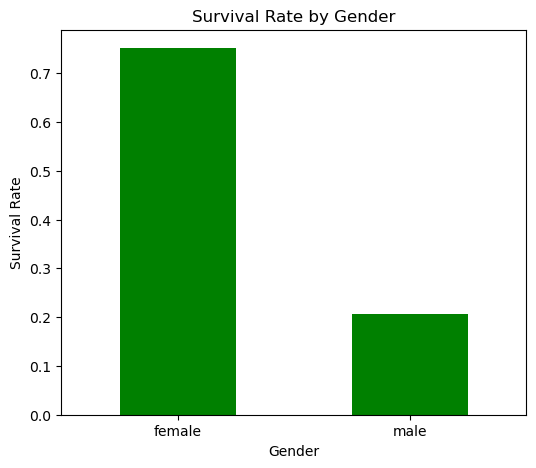

In [47]:

import matplotlib.pyplot as plt

survivalg = df.groupby("sex")["survived"].mean()
print("Survival Rate by Gender:")
print(survivalg)

plt.figure(figsize=(6, 5))
survivalg.plot(kind='bar', title='Survival Rate by Gender', color='green')
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()


In [48]:
ex_df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3']})
ex_df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], 'B': ['B4', 'B5', 'B6', 'B7']})


In [49]:
pd.concat([ex_df1, ex_df2])

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,A4,B4
1,A5,B5
2,A6,B6
3,A7,B7
